In [212]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# Importing python package pandas datareader to import data from yahoo
from pandas_datareader import data as pdr
import yfinance as yf

**below we download data from yahoo finance for tesla stocks and S&P for when we eventually attempt to calculate risk**

In [213]:
yf.pdr_override()
df1 = pdr.get_data_yahoo("TSLA", start="2015-01-01", end="2020-11-30")
df2 = pdr.get_data_yahoo("SPY", start="2015-01-01", end="2020-11-30")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [214]:
df1.shape

(1488, 6)

In [215]:
df1.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
2015-01-09,13.928000,13.998667,13.664000,13.777333,13.777333,70024500
2015-01-12,13.536667,13.631333,13.283333,13.480667,13.480667,89254500
2015-01-13,13.554667,13.840667,13.394000,13.616667,13.616667,67159500
2015-01-14,12.388667,13.013333,12.333333,12.846000,12.846000,173278500


In [216]:
# checking for nan values
df1.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [217]:
# displaying descriptive statistics of the dataset
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1.488000e+03
mean,28.288644,28.920865,27.642685,28.317123,28.317123,1.196473e+08
std,30.123831,31.022336,29.215412,30.199667,30.199667,8.827240e+07
min,9.488000,10.331333,9.403333,9.578000,9.578000,1.062000e+07
25%,15.144833,15.362499,14.872499,15.120667,15.120667,6.339975e+07
50%,18.649000,19.046000,18.371667,18.709667,18.709667,9.160350e+07
75%,23.015000,23.339499,22.623833,23.009166,23.009166,1.419885e+08
max,193.720001,199.593338,192.816666,195.253326,195.253326,9.140820e+08


In [218]:
# getting some more information on the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1488 entries, 2015-01-02 to 2020-11-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1488 non-null   float64
 1   High       1488 non-null   float64
 2   Low        1488 non-null   float64
 3   Close      1488 non-null   float64
 4   Adj Close  1488 non-null   float64
 5   Volume     1488 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 81.4 KB


In [219]:
# timeseries view of closing price (metric used to evaluate performance of a stock)
# converting date column to datetime
date = pd.to_datetime(df1.index)


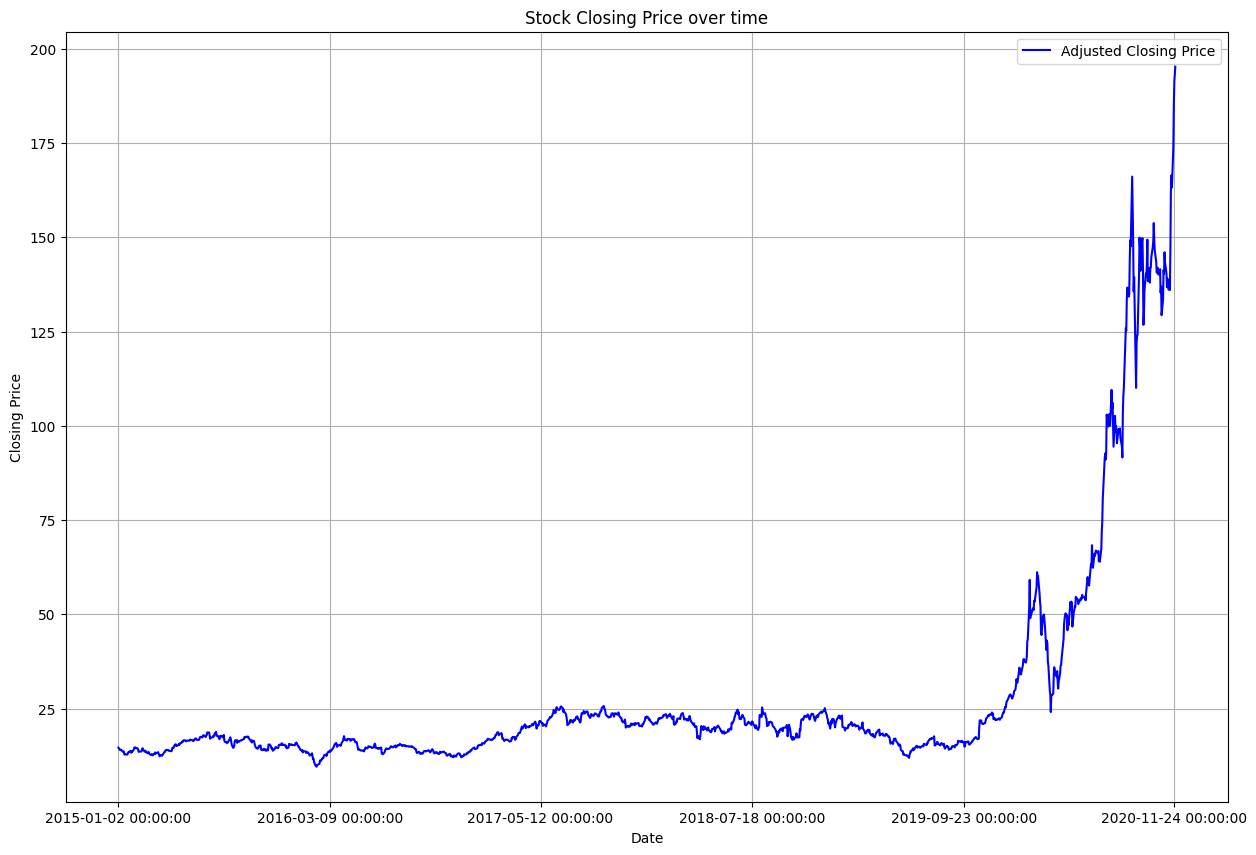

In [220]:

#creating the plot
plt.figure(figsize=(15,10))
plt.plot(df1.index, df1['Adj Close'], label='Adjusted Closing Price', color='blue')

# adding labels
plt.title('Stock Closing Price over time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# below I attempt to only display certain dates on the x axis as opposed to every single date on the date column

# setting the number of x axis labels to display
num_ticks = 5

# calculate the tick positions and labels
tick_positions = df1.index[::len(df1) // num_ticks]
tick_labels = df1.index[::len(df1) // num_ticks]

# set the x-axis tick positions and labels
plt.xticks(tick_positions, tick_labels)

plt.show()

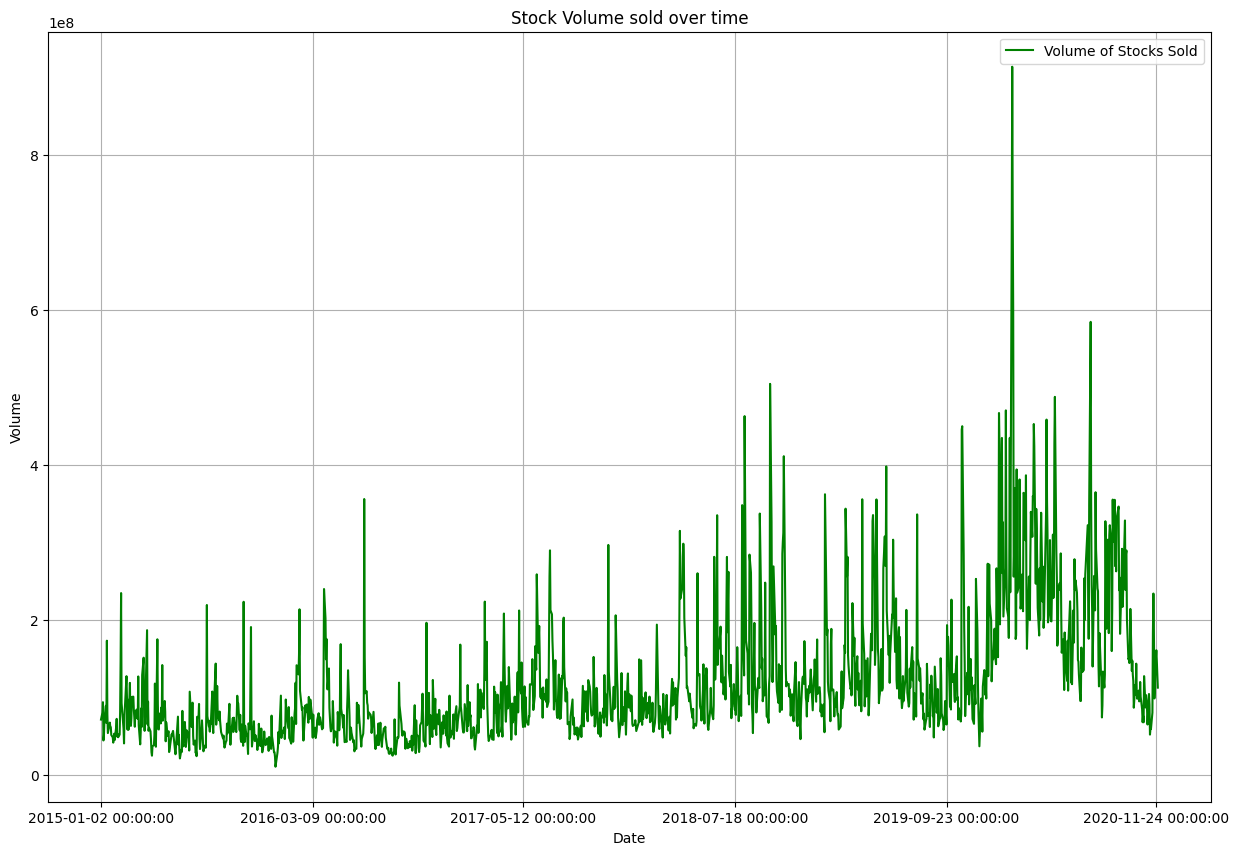

In [221]:
# plotting total volume of stocks being traded over time
#creating the plot
plt.figure(figsize=(15,10))
plt.plot(df1.index, df1['Volume'], label='Volume of Stocks Sold', color='green')


# adding labels
plt.title('Stock Volume sold over time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)

# setting the number of x axis labels to display
num_ticks = 5

# calculate the tick positions and labels
tick_positions = df1.index[::len(df1) // num_ticks]
tick_labels = df1.index[::len(df1) // num_ticks]

# set the x-axis tick positions and labels
plt.xticks(tick_positions, tick_labels)

plt.show()



In [222]:
# finding the daily return for tesla stock each day using pct_change
df1['Daily Return'] = df1['Adj Close'].pct_change(1)

In [223]:
df1['Daily Return'].head(10)

Date
2015-01-02         NaN
2015-01-05   -0.042041
2015-01-06    0.005664
2015-01-07   -0.001562
2015-01-08   -0.001564
2015-01-09   -0.018802
2015-01-12   -0.021533
2015-01-13    0.010088
2015-01-14   -0.056597
2015-01-15   -0.004256
Name: Daily Return, dtype: float64

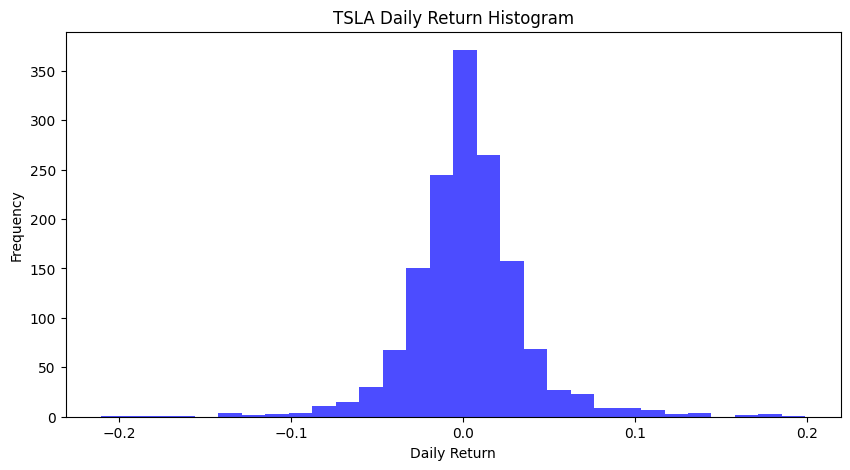

In [224]:
# plotting a histogram for a better view
plt.figure(figsize=(10, 5))

plt.hist(df1['Daily Return'], bins=30, color='blue', alpha=0.7)
plt.title('TSLA Daily Return Histogram')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

# show the histogram
plt.show()

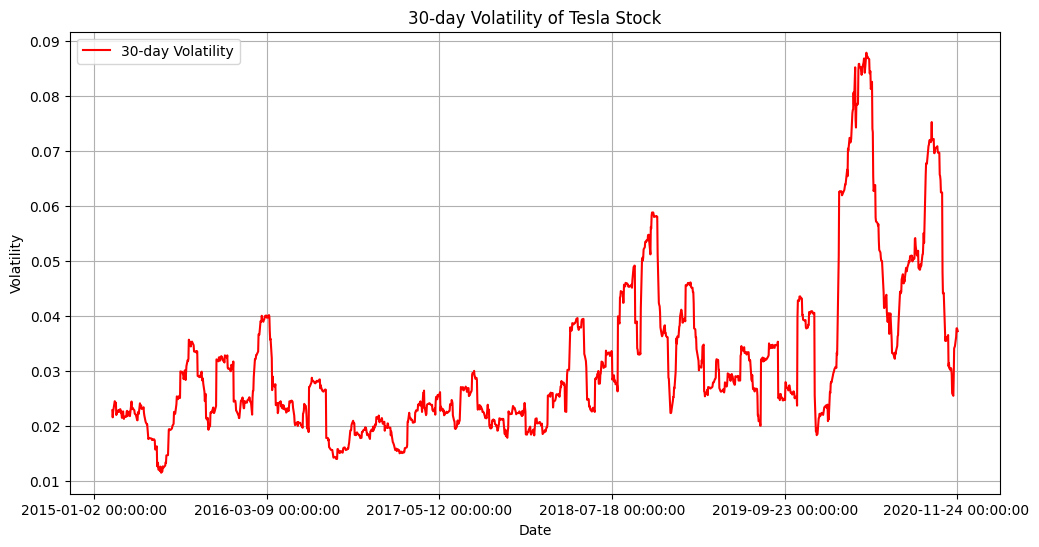

In [225]:
# calculating and quantifying risk
# volatility calculates how much the price of a stock fluctuates, this can be considered a method to quantify stock purchase risk
# volatility chart
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Daily Return'].rolling(window=30).std(), label='30-day Volatility', color='red')
plt.title('30-day Volatility of Tesla Stock')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)

# setting the number of x axis labels to display
num_ticks = 5

# calculate the tick positions and labels
tick_positions = df1.index[::len(df1) // num_ticks]
tick_labels = df1.index[::len(df1) // num_ticks]

# set the x-axis tick positions and labels
plt.xticks(tick_positions, tick_labels)

plt.show()


**Here we implement what is known as a Garch model or Generalized Autoregressive Conditional Heteroskedasticity. This is used to model the volatility of a time series and in this case we use it to model the volatility of the TSLA stock over the time period we defined earlier**

In [226]:
!pip install arch

In [227]:
import math
from arch import arch_model

In [228]:
# Calculating the log returns of the Close Value.
df2['logreturns'] = (np.log(df2['Close'])-np.log(df2['Close'].shift(1)))
df1['logreturns'] = (np.log(df1['Close'])-np.log(df1['Close'].shift(1)))

In [229]:
sp500_grch = arch_model(df2.logreturns[1:]*100, mean='Zero', vol='GARCH', p=1, q=1)
result_sp500 = sp500_grch.fit()
result_sp500.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 8006.810972928228
Iteration:      2,   Func. Count:     14,   Neg. LLF: 3486.636661653014
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1904.329201364606
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1835.5279249095402
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1833.807748221615
Iteration:      6,   Func. Count:     35,   Neg. LLF: 1833.184907222168
Iteration:      7,   Func. Count:     39,   Neg. LLF: 1833.1848579516775
Iteration:      8,   Func. Count:     42,   Neg. LLF: 1833.1848579517145
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1833.1848579516775
            Iterations: 8
            Function evaluations: 42
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:             logreturns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1833.18
Distribution:                  Normal   AIC:                           3672.37
Method:            Maximum Likelihood   BIC:                           3688.28
                                        No. Observations:                 1487
Date:                Mon, Oct 30 2023   Df Residuals:                     1487
Time:                        20:44:51   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0403  1.166e-02      3.455  5.504e-04 [1.743e-02,6.314e-02]
alpha[1]       0.2185  3.703e-02      5.900  3.642e-09     [  0.146,  0.291]
beta[1]        0.7517  3.140e-02     23.939 1.200e-126     [  0.690,  0.813]
============================================================================

Covariance estimator: robust
"""

In [230]:
#printing omega, alpha and beta values for S&P500
# alpha measures the return on investment on a stock in comparison to a market index or any other benchmark it is compared against
# beta measures the relative volatility of an investment in a stock
print("Alpha: ", result_sp500.params['alpha[1]'])
print("Beta: ", result_sp500.params["beta[1]"])
print("Omega: ", result_sp500.params["omega"])


Alpha:  0.21847715956568536
Beta:  0.7516524986048608
Omega:  0.040283316072121385


In [231]:
#GARCH MODEL FOR TESLA STOCK
tsla_garch = arch_model(df1.logreturns[1:]*100, mean="Zero", vol="GARCH", p=1)
result_tsla = tsla_garch.fit(update_freq=10)
result_tsla.summary()

Iteration:     10,   Func. Count:     52,   Neg. LLF: 3798.5062076902987
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3798.506105601559
            Iterations: 13
            Function evaluations: 63
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:             logreturns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -3798.51
Distribution:                  Normal   AIC:                           7603.01
Method:            Maximum Likelihood   BIC:                           7618.93
                                        No. Observations:                 1487
Date:                Mon, Oct 30 2023   Df Residuals:                     1487
Time:                        20:44:59   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0485  5.515e-02      0.879      0.379  [-5.962e-02,  0.157]
alpha[1]       0.0292  1.389e-02      2.099  3.578e-02 [1.937e-03,5.637e-02]
beta[1]        0.9679  1.818e-02     53.237      0.000     [  0.932,  1.004]
============================================================================

Covariance estimator: robust
"""

In [232]:
print("Alpha: ", result_tsla.params['alpha[1]'])
print("Beta: ", result_tsla.params["beta[1]"])
print("Omega: ", result_tsla.params["omega"])

Alpha:  0.029155766294794796
Beta:  0.9678886356857421
Omega:  0.048480725656079526


**Calculating Long-Term Volatility:**
Long Term Volatility helps measure the dispersion (a measure of how return on assets can be distributed) of returns for a given stock. Higher the volatility, higher the risk in investing in that stock

 𝑽𝑳 = 𝝎/(𝟏 − 𝜶 − 𝜷)

**Long Term Average Covariance**

In [233]:
#defining parameters for the long term volatility formula
alpha_sp500 = result_sp500.params['alpha[1]']
beta_sp500 = result_sp500.params["beta[1]"]
omega_sp500 = result_sp500.params["omega"]/10**4

#now for tsla stock (previously for sp500)
alpha_tsla = result_tsla.params['alpha[1]']
beta_tsla = result_tsla.params["beta[1]"]
omega_tsla = result_tsla.params["omega"]/10**4

# long term volatility of stock from the formula provided above for tesla
gamma_tsla = 1-alpha_tsla-beta_tsla
VL_tsla = np.sqrt(omega_tsla/gamma_tsla)
print("Long Term Volatility of Tesla Stock: ", VL_tsla*100,"%")

# long term volatility of stock from the formula provided above for sp500
gamma_sp500 = 1-alpha_sp500-beta_sp500
VL_sp500 = np.sqrt(omega_sp500/gamma_sp500)
print("Long Term Volatility of S&P500: ", VL_sp500*100,"%")

Long Term Volatility of Tesla Stock:  4.050063872506626 %
Long Term Volatility of S&P500:  1.1612948783177655 %


In [234]:
import numpy as np
import pandas as pd
import yfinance as yf

#initial investment
investment = 1000000

#ticker for tesla
ticker = 'TSLA'

# historical tesla stock prices
data_hist = yf.download(ticker, start="2015-01-01", end="2018-12-31")
data_hist['returns'] = data_hist['Adj Close'] / data_hist['Adj Close'].shift(1)

#  portfolio scenario calc
generating_scenarios = data_hist['returns'] * data_hist['Adj Close'].iloc[-1]

# value of the portfolio under different scenarios calculation
portfolio_value = (generating_scenarios * investment) / data_hist['Adj Close'].iloc[-1]

# portfolio losses
portfolio_loss = investment - portfolio_value
portfolio_loss_sorted = portfolio_loss.sort_values(ascending=False)

# 1 Day 99% VaR
var_99 = portfolio_loss_sorted.quantile(0.01)

# 1 Day 99% Expected Shortfall (ES)
es_99 = portfolio_loss_sorted[portfolio_loss_sorted >= var_99].mean()

print("For Portfolio (TSLA)")
print("1 Day 99% Value at Risk (VaR) =", var_99)
print("1 Day 99% Expected Shortfall (ES) =", es_99)


[*********************100%%**********************]  1 of 1 completed
For Portfolio (TSLA)
1 Day 99% Value at Risk (VaR) = -80482.01329855598
1 Day 99% Expected Shortfall (ES) = 431.9415230857244


**In this case the Value at Risk measure in risk management is used to estimate the potential loss in the value of an investment or portfolio over a given time horizon (1 day in this case) and at a given confidence interval (99% in this case which is common in risk management). This value represents the dollar amount of the maximum loss that can be expected with a specified level of confidence interval over the defined time period.
Therefore, in this case, the VaR value of -111,587 means that at a 99% confidence level there is a 1% chance that this investment in Tesla could incur a loss of $111,587.15 or more over the course of 1 single trading day.
A negative value is not common and does suggest that we may have unusual return distribution such as one with significant positive skewness.
From the below plot we can see the irregularity in the daily return throughout the years (2015-2020)**

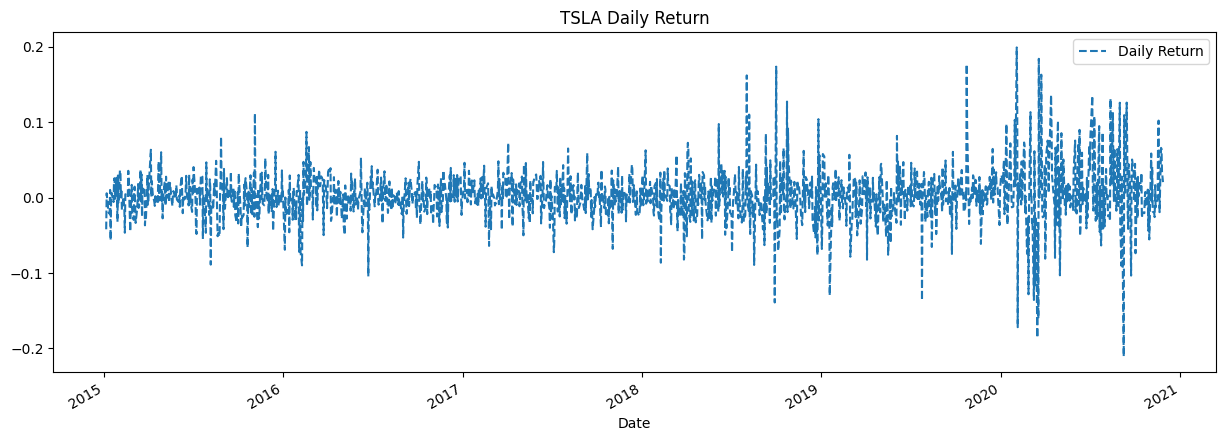

In [235]:
#plotting the daily return
plt.figure(figsize=(15, 5))

df1['Daily Return'].plot(legend=True, linestyle='--')
plt.title('TSLA Daily Return')
#show plot
plt.show()

**The next step would be to assess the accuracy of the VaR model. Backtesting involves comparing calculated VaR measure to the actual losses or gains achieved on the investment. Backtest relies on the confidence interval that is assumed during the calculated of VaR of the investment**

In [236]:


# ticker symbol for Tesla
ticker = 'TSLA'
investment = 1000000

# historical data for tsla
data = yf.download(ticker, start="2015-12-01", end="2018-12-31")
data_backtest = yf.download(ticker, start="2018-12-31", end="2020-11-30")

# daily returns during the backtest period
data_backtest['returns'] = data_backtest['Adj Close'].pct_change()

# calculate the change in portfolio value for each trading day
change_in_value = investment * (1 + data_backtest['returns']).cumprod()

# sort the returns
sorted_returns = change_in_value.sort_values()

# calculate the actual VaR for the backtest period using the historical simulation method
alpha = 0.01  # 1% VaR
var_idx = int(len(sorted_returns) * alpha)
actual_var = sorted_returns[var_idx] - investment

# calculate the number of times the actual VaR exceeded the calculated VaR
exceedances = [val for val in sorted_returns if val < -actual_var]
num_exceedances = len(exceedances)

print("The actual VaR for the backtest period:", actual_var)
print("The number of times the actual VaR exceeded the calculated VaR:", num_exceedances, "times")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
The actual VaR for the backtest period: -429507.20512700826
The number of times the actual VaR exceeded the calculated VaR: 0 times


In [237]:
import numpy as mp

In [238]:
from pandas_datareader import data as pdr

In [239]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume,logreturns
Date,,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,175.515533,121465900,NaN
2015-01-05,204.169998,204.369995,201.350006,201.720001,172.345764,169632600,-0.018225
2015-01-06,202.089996,202.720001,198.860001,199.820007,170.722443,209151400,-0.009464
2015-01-07,201.419998,202.720001,200.880005,202.309998,172.849838,125346700,0.012384
2015-01-08,204.009995,206.160004,203.990005,205.899994,175.917068,147217800,0.017589


In [240]:
df2.isna().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
logreturns    1
dtype: int64

In [241]:
df2.shape

(1488, 7)

In [242]:
df2.head(20)

,Open,High,Low,Close,Adj Close,Volume,logreturns
Date,,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,175.515533,121465900,NaN
2015-01-05,204.169998,204.369995,201.350006,201.720001,172.345764,169632600,-0.018225
2015-01-06,202.089996,202.720001,198.860001,199.820007,170.722443,209151400,-0.009464
2015-01-07,201.419998,202.720001,200.880005,202.309998,172.849838,125346700,0.012384
2015-01-08,204.009995,206.160004,203.990005,205.899994,175.917068,147217800,0.017589
2015-01-09,206.399994,206.419998,203.509995,204.250000,174.507324,158567300,-0.008046
2015-01-12,204.410004,204.600006,201.919998,202.649994,173.140305,144396100,-0.007864
2015-01-13,204.119995,205.479996,200.509995,202.080002,172.653320,214553300,-0.002817
2015-01-14,199.649994,201.100006,198.570007,200.860001,171.610977,192991100,-0.006056


In [243]:
df2.isna().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
logreturns    1
dtype: int64

In [244]:
df2.columns.values.tolist()

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'logreturns']

In [245]:
tsla_pc = df1.Close.pct_change()[1:]
spy_pc = df2.Close.pct_change()[1:]

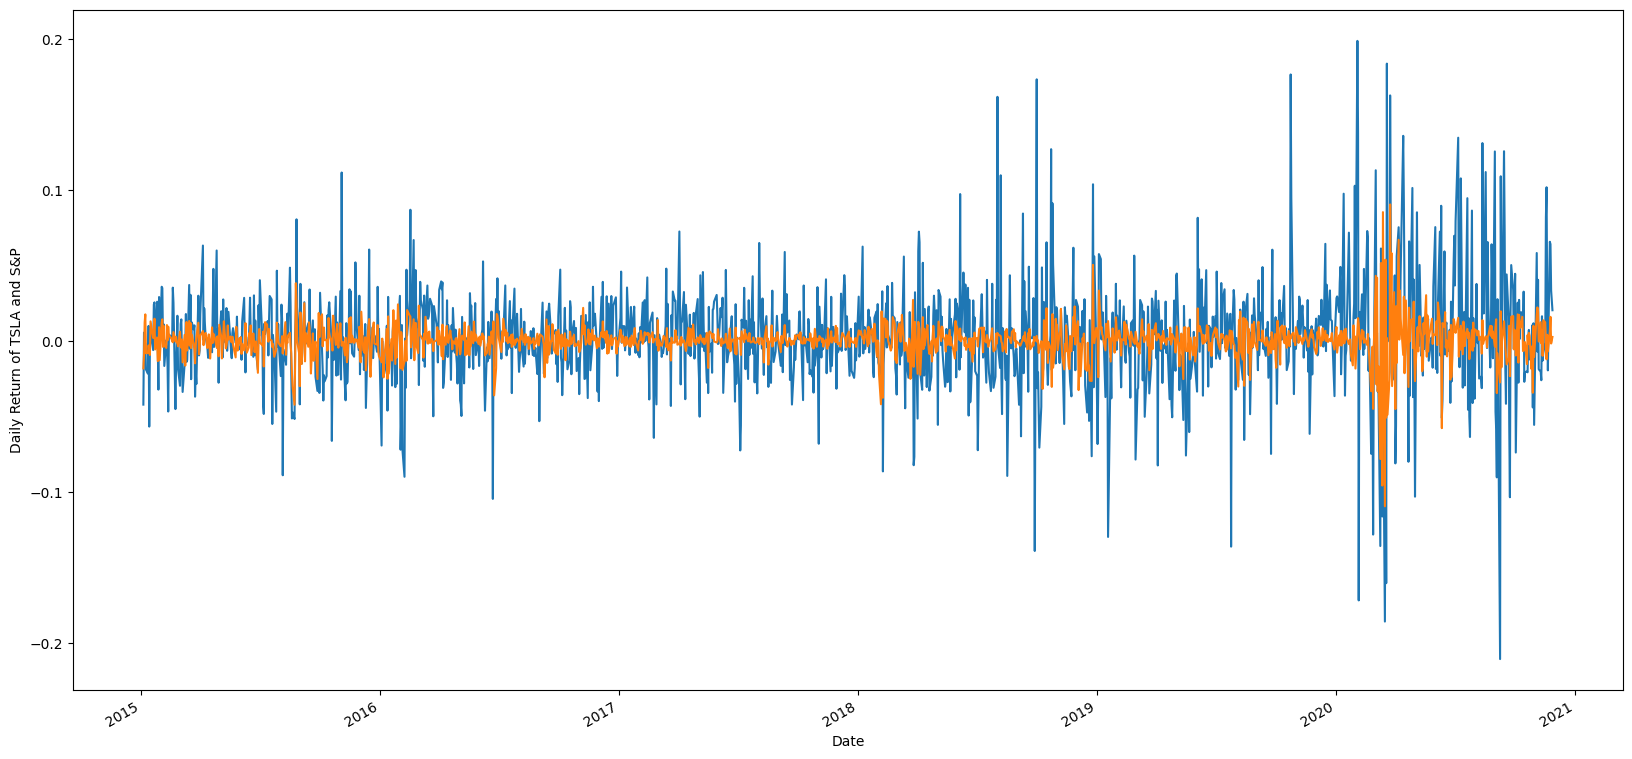

In [246]:
plt.figure(figsize=(20,10))
tsla_pc.plot()
spy_pc.plot()
plt.ylabel("Daily Return of TSLA and S&P")
plt.show()

In [247]:
df1.head() #original tesla stock data

,Open,High,Low,Close,Adj Close,Volume,Daily Return,logreturns
Date,,,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000,NaN,NaN
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500,-0.042041,-0.042950
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500,0.005664,0.005648
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000,-0.001562,-0.001563
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500,-0.001564,-0.001566


In [248]:
df1.columns.values.tolist()

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Daily Return',
 'logreturns']

In [249]:
df2.head() #this is the data from s&p500

,Open,High,Low,Close,Adj Close,Volume,logreturns
Date,,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,175.515533,121465900,NaN
2015-01-05,204.169998,204.369995,201.350006,201.720001,172.345764,169632600,-0.018225
2015-01-06,202.089996,202.720001,198.860001,199.820007,170.722443,209151400,-0.009464
2015-01-07,201.419998,202.720001,200.880005,202.309998,172.849838,125346700,0.012384
2015-01-08,204.009995,206.160004,203.990005,205.899994,175.917068,147217800,0.017589


In [250]:
import statsmodels.api as sm
from statsmodels import regression

In [251]:
#running regression model to calculate tsla's beta against S&P 500
X = spy_pc.values
Y = tsla_pc.values

In [252]:
X.shape

(1487,)

In [253]:
Y.shape

(1487,)

In [254]:
# only if dataframes require trimming to match number of records
"""N = min(X.shape[0], Y.shape[0])
X_trimmed = X[:N]
Y_trimmed = Y[:N]"""

'N = min(X.shape[0], Y.shape[0])\nX_trimmed = X[:N]\nY_trimmed = Y[:N]'

In [255]:
# function to find the alpha and beta of tsla stock
def alpha_beta(x, y):
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    # Remove constant
    x = x[:, 1]
    return model.params[0], model.params[1]

In [256]:
alpha, beta = alpha_beta(X,Y)
print('alpha:' + str(alpha))
print('beta:' + str(beta))

alpha:0.0017719507983343114
beta:1.265278962851395


In [257]:
rets = df1['Adj Close'].pct_change()

In [258]:
rets = rets.dropna()

In [259]:
rets = rets.to_frame()


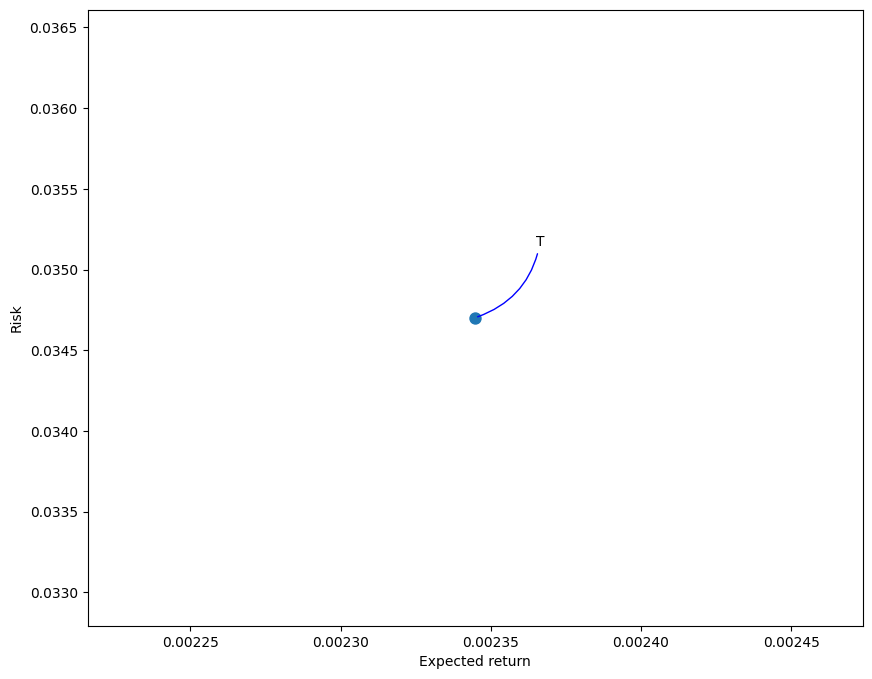

In [260]:

# Calculate expected return and risk (standard deviation) for each asset
expected_returns = rets.mean()
risks = rets.std()
labels = 'TSLA'

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(expected_returns, risks, s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(labels, expected_returns, risks):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()


In [261]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [262]:
df1.reset_index(inplace=True)



In [263]:
df1.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,logreturns
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000,NaN,NaN
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500,-0.042041,-0.042950
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500,0.005664,0.005648
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000,-0.001562,-0.001563
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500,-0.001564,-0.001566


In [264]:
data_train = df1[df1['Date']<'2019-01-01'].copy()
data_test = df1[df1['Date'] >='2019-01-01'].copy()

In [265]:
data_train.shape

(1006, 9)

In [266]:
data_train.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    1
logreturns      1
dtype: int64

In [267]:
data_train = data_train.dropna(subset=["Daily Return"])


In [268]:
data_train.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    0
logreturns      0
dtype: int64

In [269]:
data_train = data_train.drop(['Date', 'Adj Close'], axis=1)

In [270]:
data_train

,Open,High,Low,Close,Volume,Daily Return,logreturns
1,14.303333,14.433333,13.810667,14.006000,80527500,-0.042041,-0.042950
2,14.004000,14.280000,13.614000,14.085333,93928500,0.005664,0.005648
3,14.223333,14.318667,13.985333,14.063333,44526000,-0.001562,-0.001563
4,14.187333,14.253333,14.000667,14.041333,51637500,-0.001564,-0.001566
5,13.928000,13.998667,13.664000,13.777333,70024500,-0.018802,-0.018981
...,...,...,...,...,...,...,...
1001,20.900000,20.966667,19.680000,19.692667,83398500,-0.076242,-0.079305
1002,20.000000,21.798000,19.606001,21.739332,122446500,0.103930,0.098877
1003,21.322666,21.478001,20.100000,21.075333,128626500,-0.030544,-0.031020
1004,21.540001,22.416000,21.227333,22.257999,149085000,0.056116,0.054598


In [271]:
train = data_train.iloc[:, 1:2].values

In [272]:

from sklearn.preprocessing import MinMaxScaler
mm_scale = MinMaxScaler(feature_range = (0, 1))
train_scaled = mm_scale.fit_transform(train)

In [273]:
train_scaled.shape

(1005, 1)

In [274]:
x_train = []
y_train = []

for i in range(60, train_scaled.shape[0]):
    x_train.append(train_scaled[i-60:i, 0])  # Selecting columns from the second one onwards as features
    y_train.append(train_scaled[i, 0])  # Assuming the "Close" column is the target variable

# Convert the lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)


In [275]:
x_train

array([[0.2622315 , 0.25242923, 0.25490117, ..., 0.14626662, 0.15888169,
        0.16531704],
       [0.25242923, 0.25490117, 0.25072449, ..., 0.15888169, 0.16531704,
        0.15909476],
       [0.25490117, 0.25072449, 0.23444426, ..., 0.16531704, 0.15909476,
        0.1630583 ],
       ...,
       [0.66685131, 0.68986533, 0.63770032, ..., 0.71812134, 0.6798926 ,
        0.73303783],
       [0.68986533, 0.63770032, 0.59252471, ..., 0.6798926 , 0.73303783,
        0.71258098],
       [0.63770032, 0.59252471, 0.51103812, ..., 0.73303783, 0.71258098,
        0.77254516]])

In [276]:
y_train

array([0.15909476, 0.1630583 , 0.22494035, 0.21347596, 0.23836518,
       0.23610638, 0.24156151, 0.24731502, 0.23235592, 0.23278213,
       0.23099217, 0.22123251, 0.22536651, 0.23772588, 0.28516022,
       0.28345549, 0.28055746, 0.35705763, 0.34320659, 0.34094785,
       0.33208318, 0.32730989, 0.33992502, 0.36025402, 0.3388169 ,
       0.35164505, 0.35560858, 0.374659  , 0.38944758, 0.39775825,
       0.38322536, 0.40244631, 0.4045772 , 0.40926526, 0.39537166,
       0.39059837, 0.39903683, 0.41352704, 0.40287246, 0.41267473,
       0.41723488, 0.4118223 , 0.40244631, 0.4080719 , 0.40202015,
       0.40372489, 0.44229456, 0.4379901 , 0.42205073, 0.42362768,
       0.41974937, 0.41045861, 0.41966414, 0.46620356, 0.46236781,
       0.46381685, 0.46637402, 0.48171666, 0.47894647, 0.49624954,
       0.48644727, 0.47297983, 0.4941612 , 0.50140643, 0.54330034,
       0.54006133, 0.51240193, 0.45103138, 0.46019436, 0.46040738,
       0.4584895 , 0.47315042, 0.47954309, 0.47830718, 0.51385

In [277]:
# Reshaping- add dimension in numpy array
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [278]:
data_test = data_test.drop(['Date', 'Adj Close'], axis=1)

In [279]:
data_test.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Daily Return    0
logreturns      0
dtype: int64

In [280]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [281]:
# initialize regressor and add the first LSTM layer along with dropout regularization
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Add a second LSTM Layer and Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Add a third layer and some dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and Dropout
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Output layer addition
regressor.add(Dense(units=1))


In [282]:
#compiling RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [283]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [284]:
#training
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 13s 154ms/step - loss: 0.0471
Epoch 2/100
30/30 [==============================] - 3s 117ms/step - loss: 0.0150
Epoch 3/100
30/30 [==============================] - 4s 118ms/step - loss: 0.0129
Epoch 4/100
30/30 [==============================] - 5s 153ms/step - loss: 0.0128
Epoch 5/100
30/30 [==============================] - 4s 118ms/step - loss: 0.0119
Epoch 6/100
30/30 [==============================] - 4s 118ms/step - loss: 0.0108
Epoch 7/100
30/30 [==============================] - 4s 134ms/step - loss: 0.0119
Epoch 8/100
30/30 [==============================] - 4s 134ms/step - loss: 0.0112
Epoch 9/100
30/30 [==============================] - 4s 118ms/step - loss: 0.0098
Epoch 10/100
30/30 [==============================] - 4s 117ms/step - loss: 0.0094
Epoch 11/100
30/30 [==============================] - 5s 151ms/step - loss: 0.0084
Epoch 12/100
30/30 [==============================] - 4s 118ms/step - loss: 0.0091
Epoch 13/100

In [285]:
data_test.head()

,Open,High,Low,Close,Volume,Daily Return,logreturns
1006,20.406668,21.008667,19.920000,20.674667,174879000,-0.068149,-0.070582
1007,20.466667,20.626667,19.825333,20.024000,104478000,-0.031472,-0.031978
1008,20.400000,21.200001,20.181999,21.179333,110911500,0.057697,0.056094
1009,21.448000,22.449333,21.183332,22.330667,113268000,0.054361,0.052935
1010,22.797333,22.934000,21.801332,22.356667,105127500,0.001164,0.001164


In [286]:
data_total = pd.concat((data_train['Close'], data_test['Close']), axis = 0)

In [287]:
actual_price = data_test.iloc[:, 1:2].values

In [288]:
data_total

1        14.006000
2        14.085333
3        14.063333
4        14.041333
5        13.777333
           ...    
1483    163.203339
1484    173.949997
1485    185.126663
1486    191.333328
1487    195.253326
Name: Close, Length: 1487, dtype: float64

In [289]:
data_total.shape

(1487,)

In [290]:
entries = data_total[len(data_total) - len(data_test) - 60:].values
entries = entries.reshape(-1,1)
entries = mm_scale.transform(entries)


In [291]:
entries.shape

(542, 1)

In [292]:
x_test = []
for i in range(60, entries.shape[0]):
    x_test.append(entries[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [293]:
stock_predict = regressor.predict(x_test)


16/16 [==============================] - 2s 31ms/step


In [294]:
stock_predict = mm_scale.inverse_transform(stock_predict)

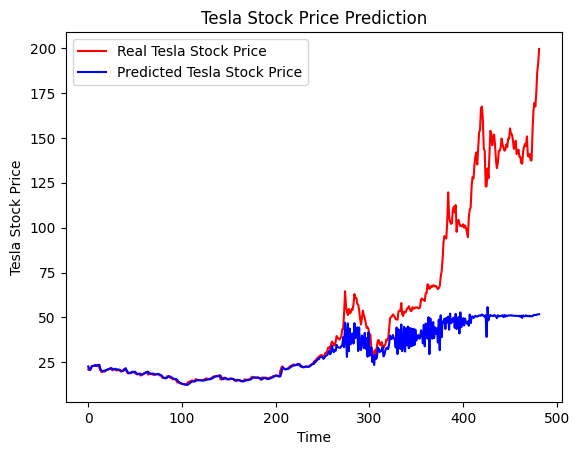

In [295]:
# Visualising the results
plt.plot(actual_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(stock_predict, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()